# EXPLORATORY DATA ANALYSIS 

PASO 0: LIBRERIAS Y BASE DE DATOS

In [38]:
# LIBRERÍAS
import pandas as pd
import sqlite3 as sq
import seaborn as sns
import matplotlib.pyplot as plt

# URL
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'

# TRAER DOCUMENTO
total_data = pd.read_csv(URL)

# CREAR COPIA EN BASE DE DATOS LOCAL
con = sq.connect('diabetes.db')
total_data.to_sql('diabetes', con, index=False, if_exists='replace')
con.commit()
con.close()

PASO 1: ANALISIS DESCRIPTIVO DE DATA

In [20]:
# Dimensiones
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
# DUPLICADOS
total_data.duplicated().sum()

0

Conclusiones: 

- 768 entradas y 9 columnas (8 + target)

- NO hay valores nulos

- NO hay valores repetidos

Explicación de las columnas (inglés):

1. Pregnancies. Number of pregnancies of the patient (numeric)
2. Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
3. BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
4. SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
5. Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
6. BMI. Body mass index (numeric)
7. DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
8. Age. Age of patient (numeric)
9. Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [22]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


PASO 2: ANÁLISIS UNIVARIANTE

No existen variables categóricas de texto (excepto la predictora, todas son numéricas)

(-0.1, 1.1)

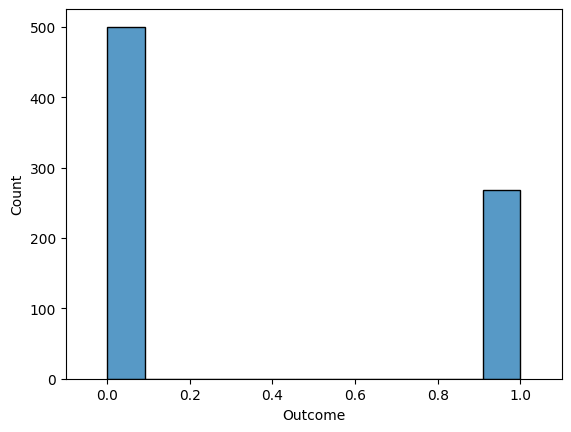

In [23]:
# Variables categóricas
sns.histplot(data = total_data, x = "Outcome").set_xlim(-0.1, 1.1)


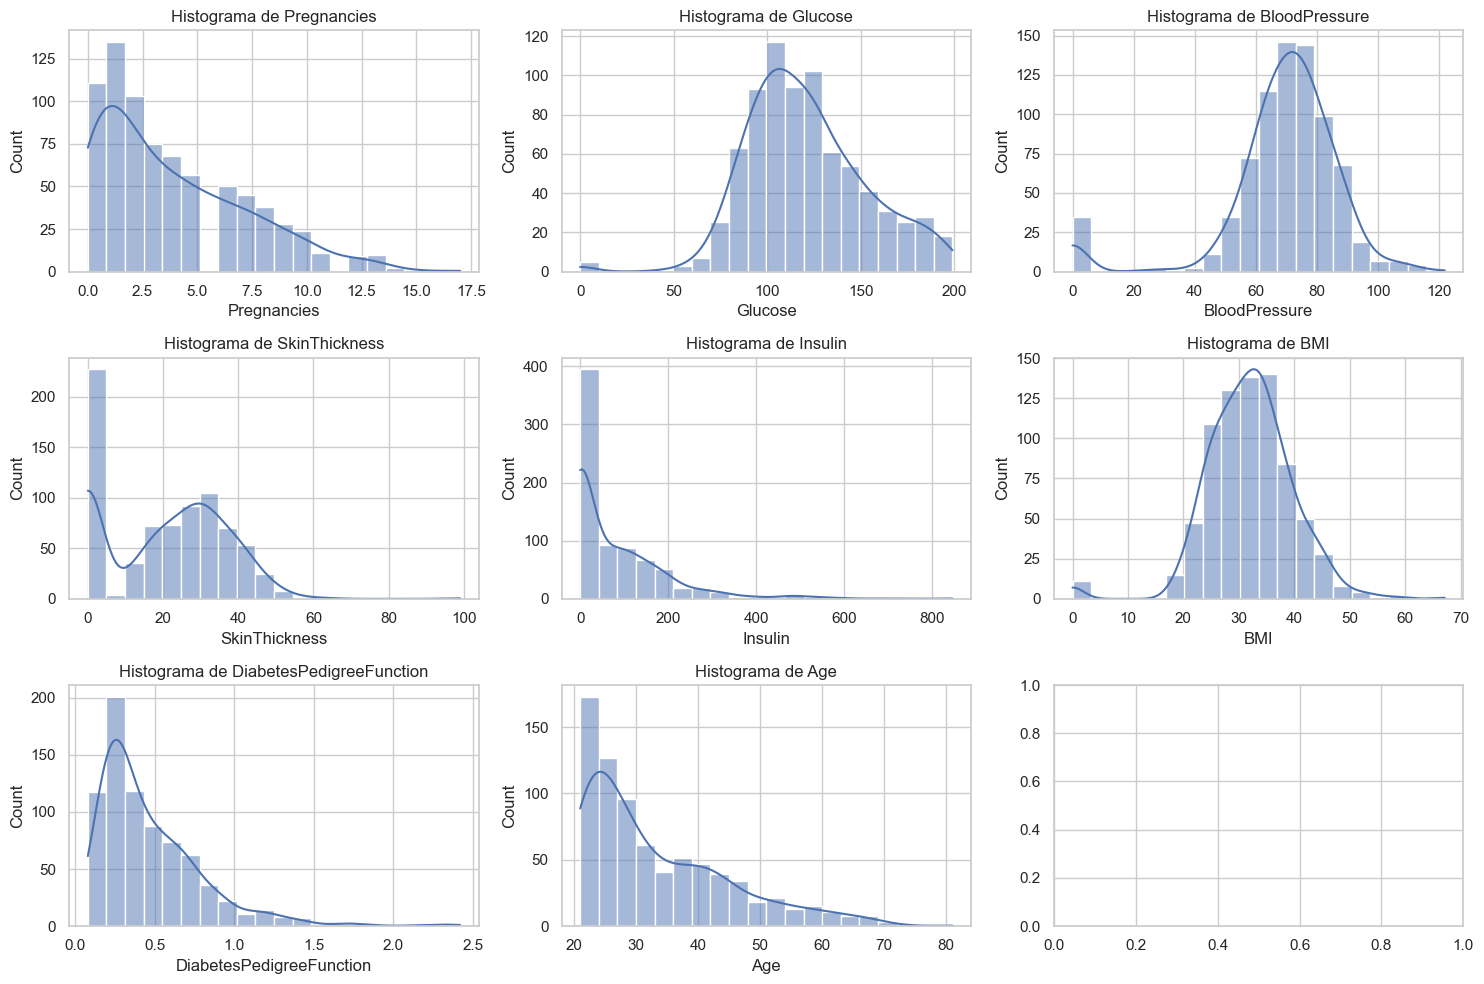

In [45]:
sns.set(style="whitegrid")

# Variables numéricas
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Crear subgráficos de histogramas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, variable in enumerate(numeric_variables):
    sns.histplot(total_data[variable], bins=20, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Histograma de {variable}')

plt.tight_layout()
plt.show()


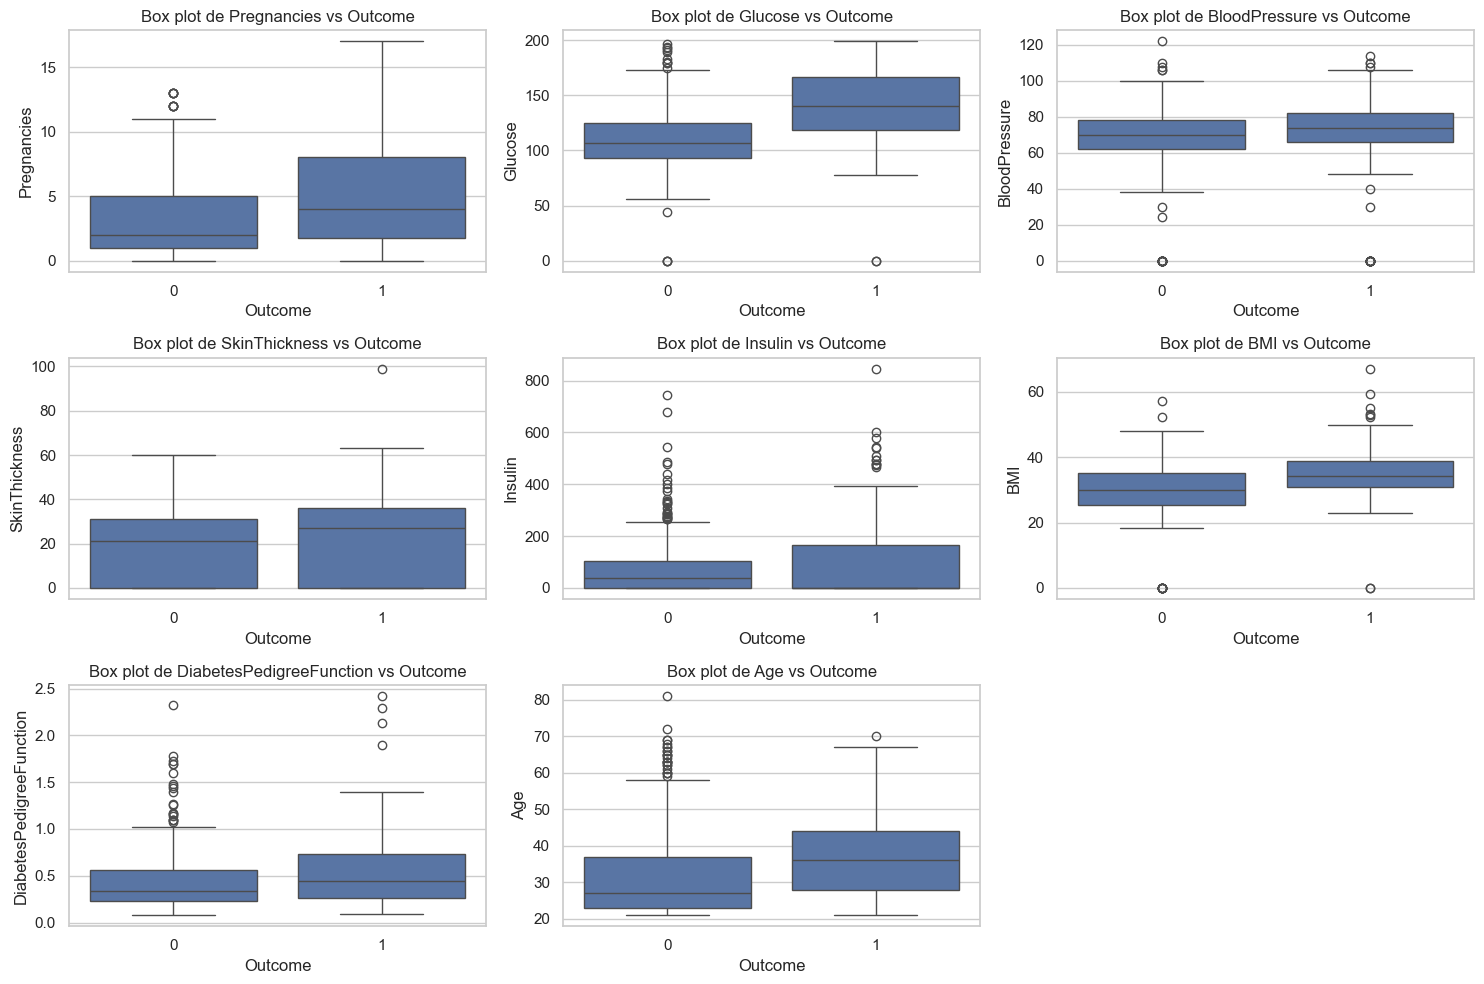

In [50]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')

plt.tight_layout()
plt.show()

PASO 3: ANÁLISIS MULTIVARIANTE

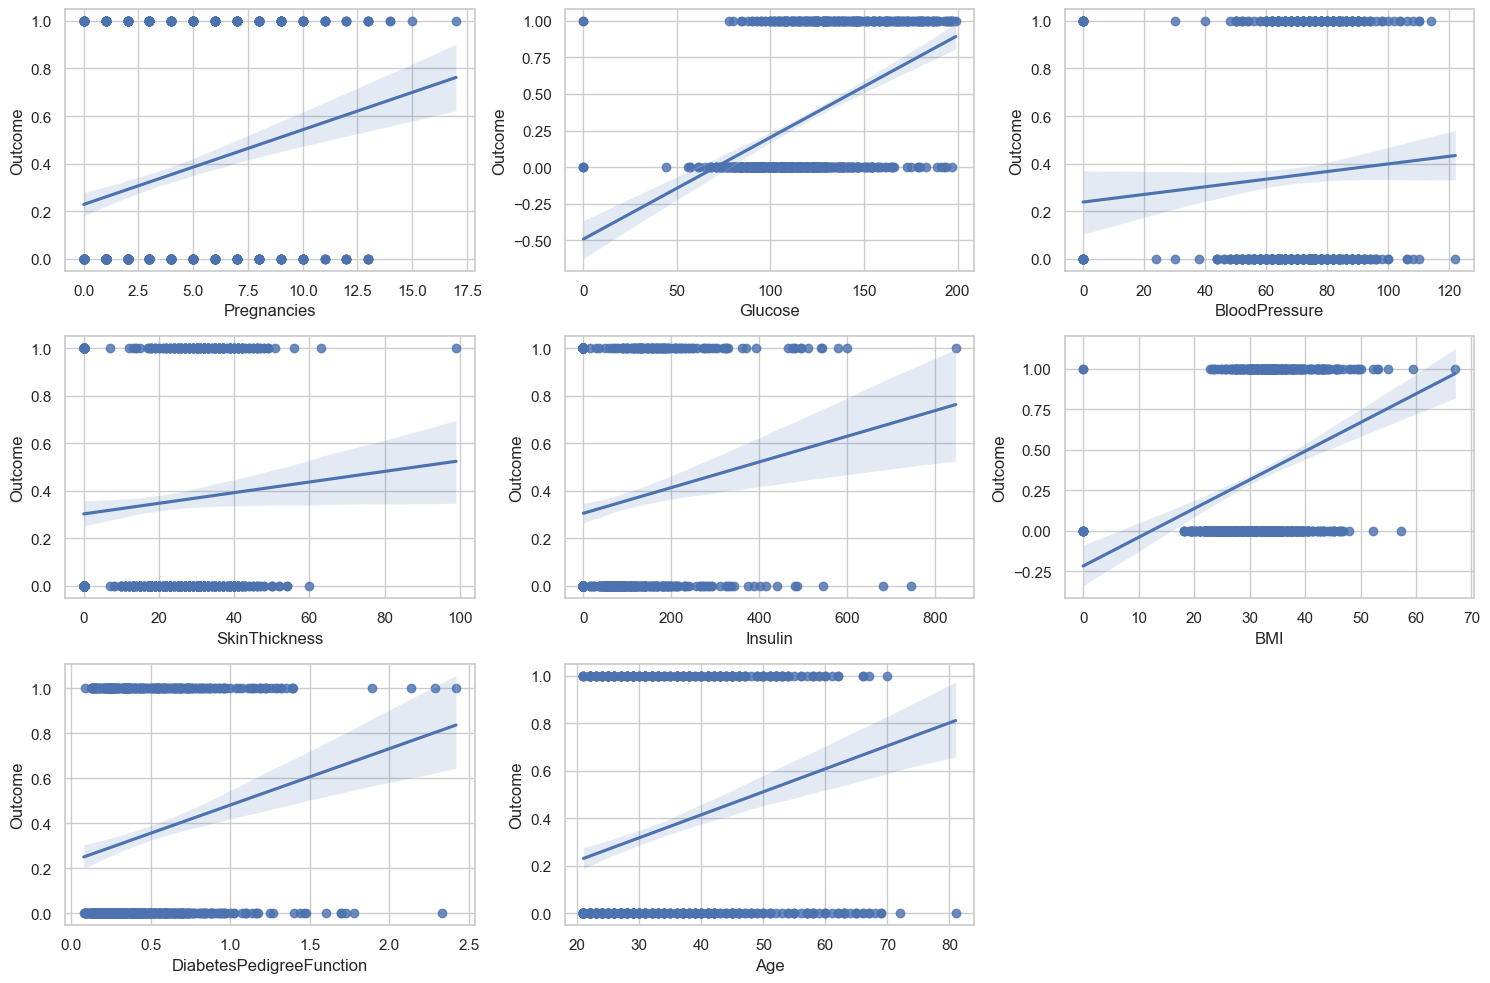

In [56]:
# análisis numérico-numérico
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=variable, y="Outcome", data=total_data)

plt.tight_layout()
plt.show()

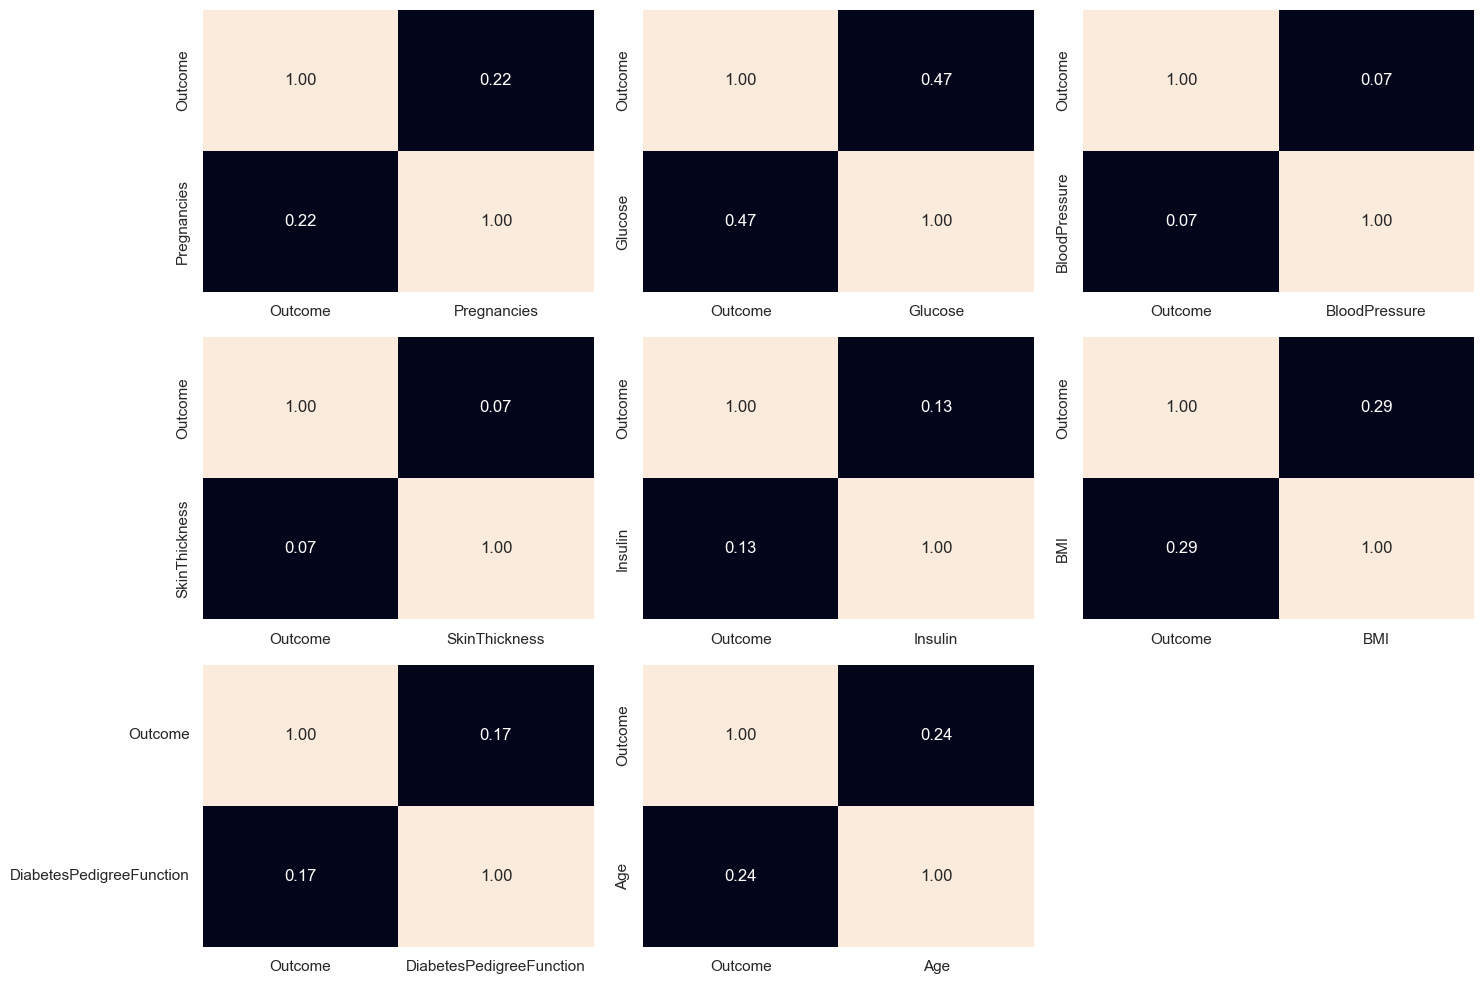

In [58]:
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.heatmap(total_data[["Outcome", variable]].corr(), annot=True, fmt=".2f", cbar=False)

plt.tight_layout()
plt.show()

El análisis numérico numérico muestra lo siguiente:

1. La relación entre las predictoras y la target (Outcome) Es alta en las siguientes:

    Glucosa
    
    BMI (índice de masa corporal)
    
    Edad
    
    Embarazos

2. La relación es baja en las siguientes:

    DiabetesPedigreeFunction

    Presión Sanguínea

    Insulina

    